# check

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

%matplotlib inline

In [3]:
#version 2014.10
#version 2015.10
cmd= r'"C:\Program Files (x86)\CMG\BR\2014.10\Win_x64\EXE\report.exe"'
fol='fhfrate'
passa = cmd + ' -f ' + fol + r'\fhf.rwd -o ' + fol + r'\fhf.rwo'
print(passa)
os.system(passa)

"C:\Program Files (x86)\CMG\BR\2014.10\Win_x64\EXE\report.exe" -f fhfrate\fhf.rwd -o fhfrate\fhf.rwo


0

# History data読み込み

In [4]:
def RATE(file, rows, rowf, well):
    f = open(file)
    lines = f.readlines()
    f.close

    fin=[]

    list1 = rows
    list2 = rowf
    list3 = well

    for i in range(len(lines)):
        a = lines[i].split()
        for (row1, row2, well) in zip(list1, list2, list3):
            if(i>=row1  and i<row2): 
                a.append(well) 
                fin.append(a)

            
    D=pd.DataFrame(fin)
    D.columns=['TIME', 'DATE', 'OPR', 'WCT', 'BHP', 'WELL']
    D['TIME'] = pd.to_numeric(D['TIME']) 
    D['DATE'] = pd.to_datetime(D['DATE'])
    D['OPR'] = pd.to_numeric(D['OPR'])
    D['WCT'] = pd.to_numeric(D['WCT'])
    D['BHP'] = pd.to_numeric(D['BHP'])

    return D
    
    
#HIST.dtypes
rows = [8, 29, 50, 71, 92, 113, 134, 155, 176, 197, 218]
rowf = [21,42, 63, 84, 105, 126, 147, 168, 189, 210, 231]
well = ['J1', 'J2', 'J3', 'J5', 'J6', 'J7', 'A1', 'A2', 'A3', 'A4', 'A5']
passb = fol + r'\fhf.rwo'
HIST = RATE(passb, rows, rowf, well)
HIST.head(3)

,TIME,DATE,OPR,WCT,BHP,WELL
0,0.0,2001-01-01,0.0,0.0,0.00,J1
1,90.0,2001-04-01,1500.0,0.0,3487.10,J1
2,181.0,2001-07-01,1500.0,0.0,3341.14,J1


In [5]:
HIST['TIMEDIF'] = HIST['TIME'] - HIST['TIME'].shift(1)

zero=[0, 13, 26, 39, 52, 65, 78, 91, 104, 117, 130]
for i in zero:
    HIST.loc[i, 'TIMEDIF']=0
    
HIST['OPT'] = HIST.OPR*HIST.TIMEDIF
HIST['WPR'] = HIST.WCT/(100-HIST.WCT)*HIST.OPR
HIST['WPT'] = HIST.WPR*HIST.TIMEDIF

wj1=HIST[HIST.WELL=='J1'].reset_index(drop=True)
wj2=HIST[HIST.WELL=='J2'].reset_index(drop=True)
wj3=HIST[HIST.WELL=='J3'].reset_index(drop=True)
wj5=HIST[HIST.WELL=='J5'].reset_index(drop=True)
wj6=HIST[HIST.WELL=='J6'].reset_index(drop=True)
wj7=HIST[HIST.WELL=='J7'].reset_index(drop=True)
wa1=HIST[HIST.WELL=='A1'].reset_index(drop=True)
wa2=HIST[HIST.WELL=='A2'].reset_index(drop=True)
wa3=HIST[HIST.WELL=='A3'].reset_index(drop=True)
wa4=HIST[HIST.WELL=='A4'].reset_index(drop=True)
wa5=HIST[HIST.WELL=='A5'].reset_index(drop=True)

cumoil=[wj1.OPT, wj2.OPT, wj3.OPT, wj5.OPT, wj6.OPT, wj7.OPT, wa1.OPT, wa2.OPT, wa3.OPT, wa4.OPT, wa5.OPT]
cumwat=[wj1.WPT, wj2.WPT, wj3.WPT, wj5.WPT, wj6.WPT, wj7.WPT, wa1.WPT, wa2.WPT, wa3.WPT, wa4.WPT, wa5.WPT]
FOPTH=pd.concat(cumoil, axis=1)
FWPTH=pd.concat(cumwat, axis=1)
FOPTH.columns=['J1', 'J2', 'J3', 'J5', 'J6', 'J7', 'A1', 'A2', 'A3', 'A4', 'A5']
FWPTH.columns=['J1', 'J2', 'J3', 'J5', 'J6', 'J7', 'A1', 'A2', 'A3', 'A4', 'A5']

FOPTH=FOPTH.assign(
        TOTAL=lambda FOPTH: FOPTH.apply(lambda row: sum(row), axis=1)
    )
FWPTH=FWPTH.assign(
        TOTAL=lambda FWPTH: FWPTH.apply(lambda row: sum(row), axis=1)
    )
FOPTH['DATE'] = wj1.DATE
FWPTH['DATE'] = wj1.DATE
FOPTH['FOPT'] = FOPTH['TOTAL'].copy()
FWPTH['FWPT'] = FWPTH['TOTAL'].copy()
for i in range(1, len(FOPTH)):
    FOPTH.loc[i, 'FOPT'] = FOPTH.loc[i-1, 'FOPT'] + FOPTH.loc[i, 'TOTAL']
    FWPTH.loc[i, 'FWPT'] = FWPTH.loc[i-1, 'FWPT'] + FWPTH.loc[i, 'TOTAL']

FOPTH = FOPTH.set_index('DATE')
FWPTH = FWPTH.set_index('DATE')

FWPTH.head(3)

,J1,J2,J3,J5,J6,J7,A1,A2,A3,A4,A5,TOTAL,FWPT
DATE,,,,,,,,,,,,,
2001-01-01,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2001-04-01,0.0,0.0,854.458068,0.0,223.555865,14596.214331,0.0,0.0,0.0,0.0,0.0,15674.228263,15674.228263
2001-07-01,0.0,0.0,1408.551641,0.0,1717.219445,18859.903981,0.0,0.0,0.0,0.0,0.0,21985.675068,37659.903331


# CMG data読み込み
* Version 2014.10 
* Version 2015.10

In [24]:
def make_rwd(folder, data):
    infile=  fol + '\\' + data + r'.rwd'
    outfile= fol + '\\' + data + r'.rwo'
    cmgrwd=  fol + r'\CMG.rwd'

    text1 = '*FILE ' + '\'' + folder + '\\' + data +'.irf' + '\''

    with open(cmgrwd) as fwell:
        wellrate = fwell.read()

    with open(infile, 'w') as f:
        f.write(text1)
        f.write('\n')
        f.write(wellrate)

    ##############################
    #version 2014.10
    #version 2015.10
    cmd= r'"C:\Program Files (x86)\CMG\BR\2014.10\Win_x64\EXE\report.exe"'
    os.system(cmd + ' -f ' + infile + ' -o ' + outfile)
    

#ff = r'C:\CMG2016\GSLIB\003-RUN\run'
ff = r'C:\CMG2016\GSLIB\MODEL-RUN'
d1='model01_AQ80-40_D18-05E18-07-03_SWCRIT'
d2='model01_AQ80-40_D18-05E18-07-03J_SWCRIT'

make_rwd(ff, d1)
make_rwd(ff, d2)

In [25]:
def CMG(file):
    #s1 = [8, 53, 98, 143, 188, 233, 278, 323, 368, 413, 458]
    #f1 = [45, 90, 135, 180, 225, 270, 315, 360, 405, 450, 495]
    s1 = [8, 54, 100, 146, 192, 238, 284, 330, 376, 422, 468]
    f1 = [46, 92, 138, 184, 230, 276, 322, 368, 414, 460, 506]
    w1 = ['J1', 'J2', 'J3', 'J5', 'J6', 'J7', 'A1', 'A2', 'A3', 'A4', 'A5']
    text =fol + r'\\' + file +'.rwo'
    W = RATE(text, s1, f1, w1)
    
    #s2 = [506]
    #f2 = [543]
    s2 = [517]
    f2 = [555]
    w2 = ['']
    CMG = RATE(text, s2, f2, w2)
    CMG.rename(columns={'OPR': 'OPT', 'WCT': 'WPT', 'BHP': 'AveP'}, inplace=True)
    CMG = CMG.drop('WELL',1)
    CMG = CMG.set_index('DATE')
    
    return (W, CMG)

W1, F1 = CMG(d1)
W2, F2 = CMG(d2)


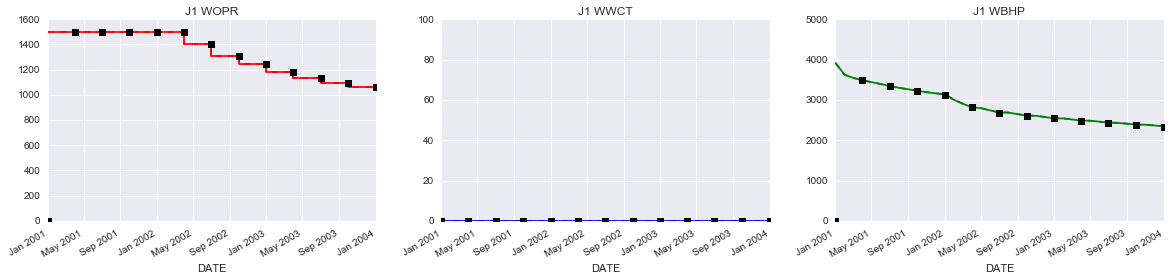

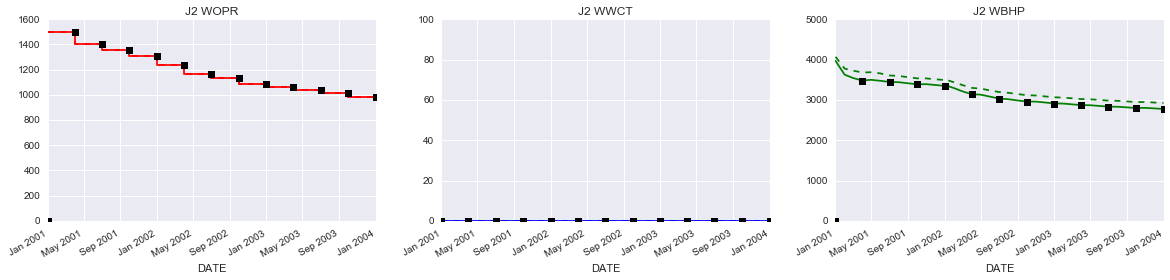

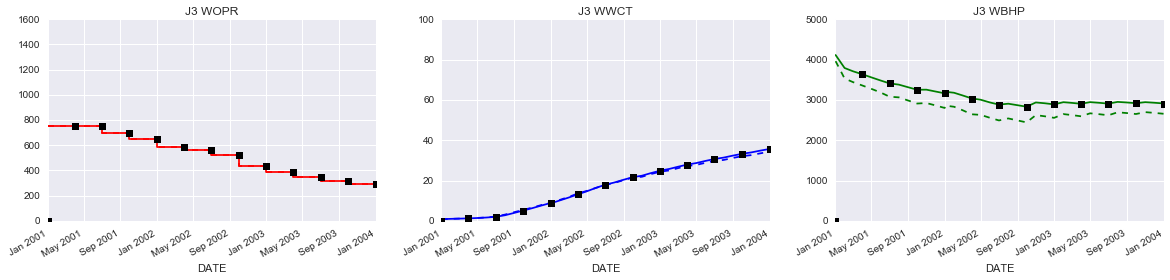

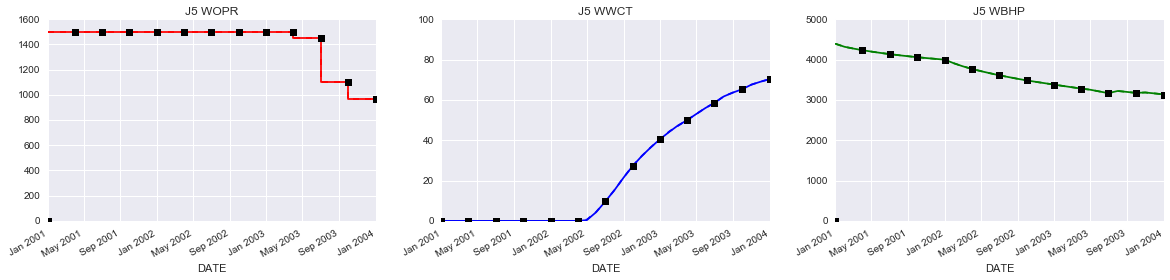

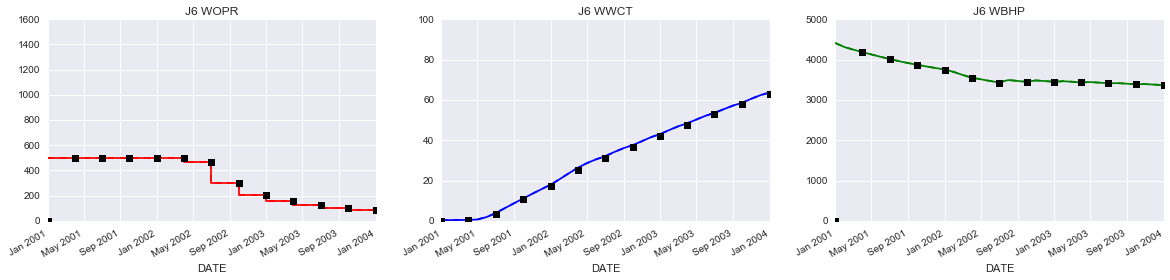

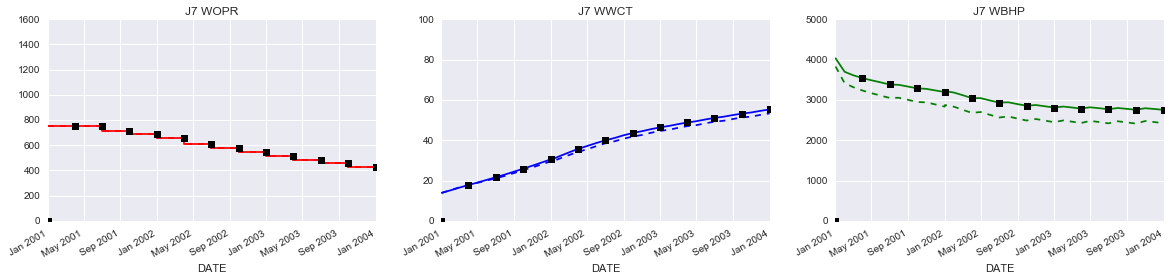

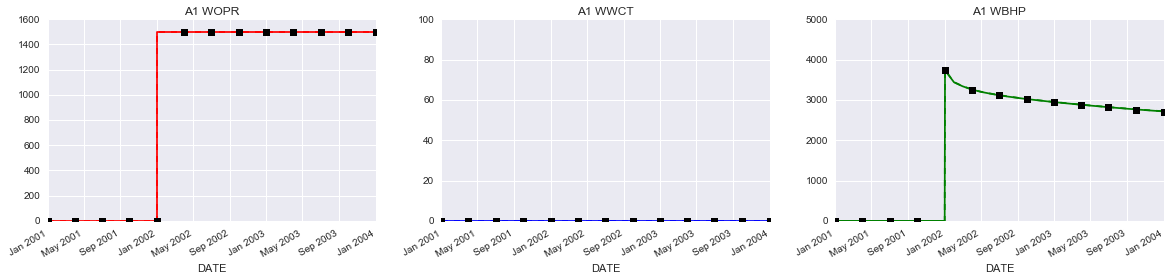

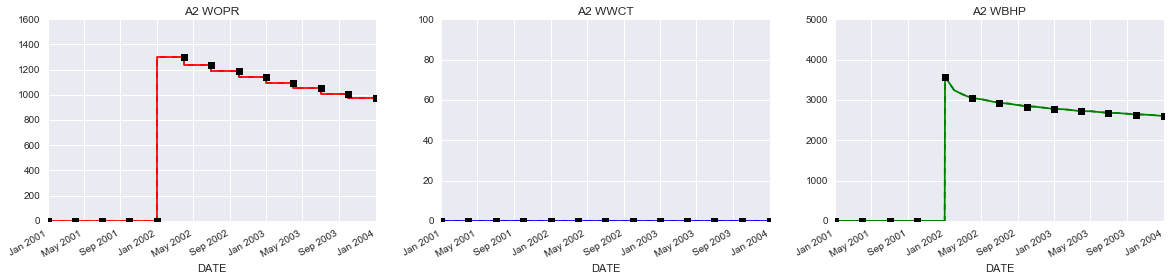

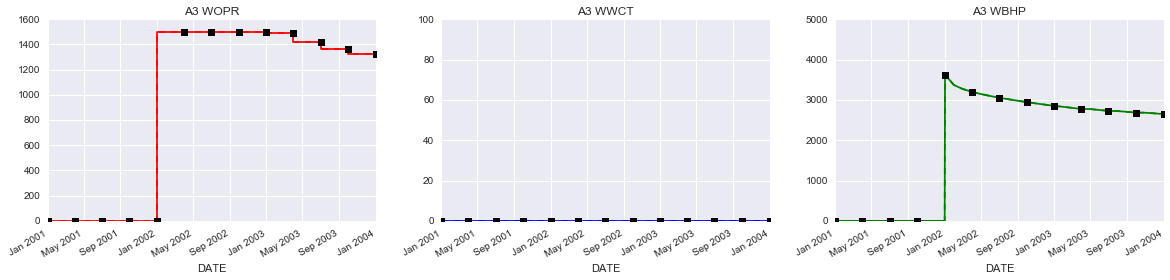

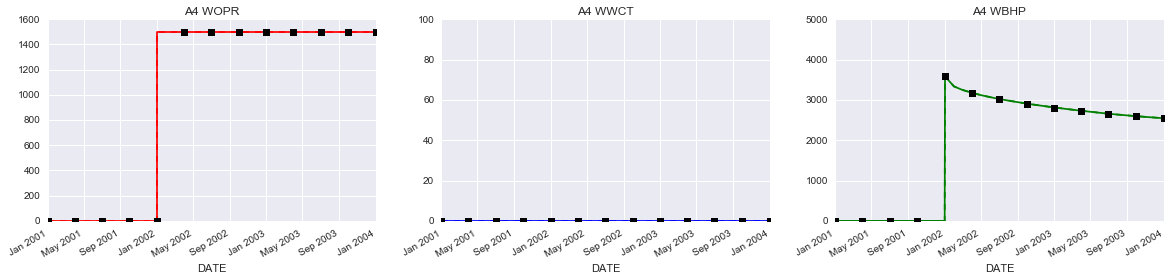

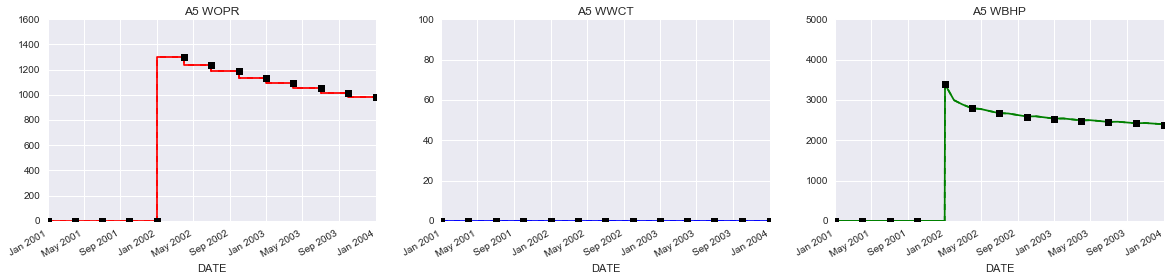

In [26]:
def plotwell(well, RUN1, RUN2):
    plt.figure(figsize=(20,4))
    plt.subplot(1, 3, 1)
    H=HIST[HIST.WELL==well].copy()
    h = H.set_index('DATE')
    t1 = RUN1[RUN1.WELL==well].set_index('DATE')
    t2 = RUN2[RUN2.WELL==well].set_index('DATE')
    t1['OPR'].plot(style='--r', drawstyle='steps-pre')
    t2['OPR'].plot(style='r', drawstyle='steps-pre')
    h['OPR'].plot(style='ks')

    plt.ylim([0,1600])
    plt.title(well + ' WOPR')

    plt.subplot(1, 3, 2)
    t1['WCT'].plot(style='--b')
    t2['WCT'].plot(style='b')
    h['WCT'].plot(style='ks')
    plt.ylim([0,100])
    plt.title(well + ' WWCT')

    plt.subplot(1, 3, 3)
    t1['BHP'].plot(style='--g')
    t2['BHP'].plot(style='g')
    h['BHP'].plot(style='ks')
    plt.ylim([0,5000])
    plt.title(well + ' WBHP')
    
    name=well+'.PNG'
    plt.savefig(name)
    
####################################    
DATA1 = W1.copy()
DATA2 = W2.copy()

plotwell('J1', DATA1, DATA2)
plotwell('J2', DATA1, DATA2)
plotwell('J3', DATA1, DATA2)
plotwell('J5', DATA1, DATA2)
plotwell('J6', DATA1, DATA2)
plotwell('J7', DATA1, DATA2)
plotwell('A1', DATA1, DATA2)
plotwell('A2', DATA1, DATA2)
plotwell('A3', DATA1, DATA2)
plotwell('A4', DATA1, DATA2)
plotwell('A5', DATA1, DATA2)
